# In-depth: Naive Bayes

- Supervised learning, classification.
- Fast classification
- Simple
- Best on high-dimensional data

In [159]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

- Assumes that the data drawn from each label is drawn from a Gaussian distribution

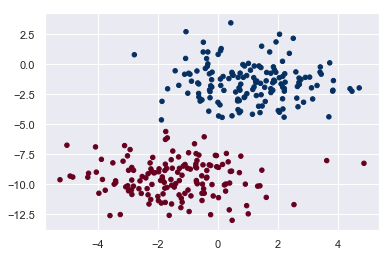

In [160]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu');

In [162]:
rng = np.random.RandomState(42)

In [163]:
# Grab the gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

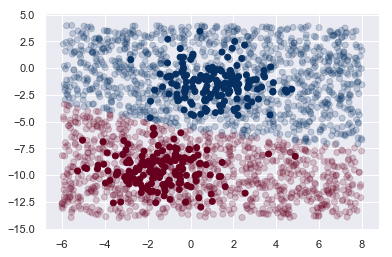

In [176]:
# Make the model and fit it to X and Y
model = GaussianNB().fit(X, y)

# Make a shitload of random points
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

# Predict using xnew
ynew = model.predict(Xnew)

# Plot the new data to get an idea of where the decision boundary is
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], alpha=0.2, c=ynew, cmap='RdBu');

## Multinomial Naive Bayes

**Classify text**

In [177]:
from sklearn.datasets import fetch_20newsgroups

In [178]:
data = fetch_20newsgroups()

In [179]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [181]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# Fetch only some specific categories to make things simpler
train = fetch_20newsgroups(subset='train', categories=categories)
test  = fetch_20newsgroups(subset='test', categories=categories)

**Make a pipeline that converts contents of each string into a vector of number using the TF-IDF vectorizer, then attaches it to a multinomial naive Bayes classifier.**

In [183]:
 # Grab TfidfVectorizer, multinomial naive bayes, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
    

# Make the model
model = make_pipeline(TfidfVectorizer(),
                     MultinomialNB())

In [190]:
# Fit the model to the training data and target
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [191]:
# Get the labels
labels = model.predict(test.data)

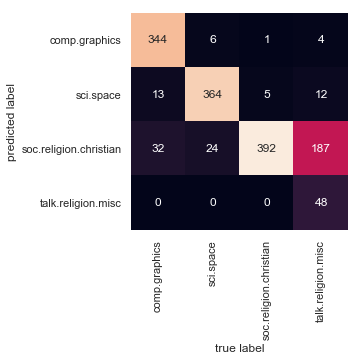

In [192]:
# Make a confusion matrix, then plot a heatmap on it

# Import the confusion_matrix class, use it to make 'mat'
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

# Make a heatmap with seaborn
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names);

# Label x and y axis
plt.xlabel('true label')
plt.ylabel('predicted label');